In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
rawdata = pd.read_csv('/content/Ecommerce Customers')

# Display the first 5 rows of the dataset
rawdata.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
# Check for missing values in the dataset
sum = rawdata.isnull().sum()
print(f"The count of Null values\n{sum}")

The count of Null values
Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [4]:
# Display summary statistics of the dataset
rawdata.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


<ipython-input-5-3707b359aa9b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=y_values, palette=['tab:blue', 'tab:red'])


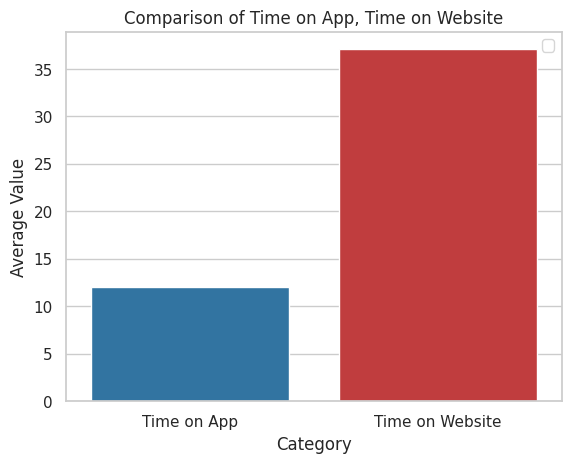

In [5]:
# Calculate the average values
avg_time_on_app = rawdata['Time on App'].mean()
avg_time_on_website = rawdata['Time on Website'].mean()


# Prepare the data for plotting
x_values = ['Time on App', 'Time on Website']
y_values = [avg_time_on_app, avg_time_on_website]

# Create a bar plot
sns.set_theme(style="whitegrid")
sns.barplot(x=x_values, y=y_values, palette=['tab:blue', 'tab:red'])
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.title('Comparison of Time on App, Time on Website')
plt.legend()
plt.show()

In [6]:
# @title Interpretation
#Interpretation
#Users might spend more time on the website app compared to the app for the same amount of money spent.

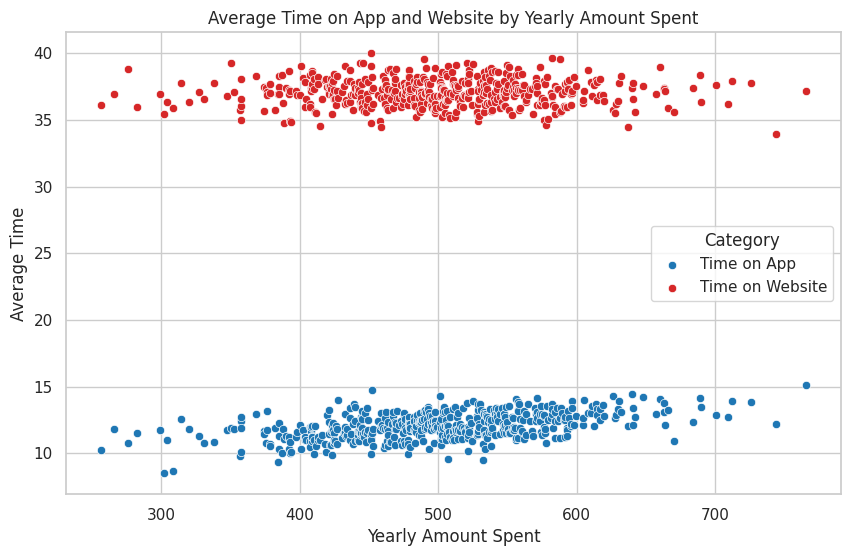

In [7]:
grouped_data= rawdata.groupby('Yearly Amount Spent')[['Time on App', 'Time on Website']].mean()
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Yearly Amount Spent', y='Time on App', data=grouped_data, color='tab:blue', label='Time on App')
sns.scatterplot(x='Yearly Amount Spent', y='Time on Website', data=grouped_data, color='tab:red', label='Time on Website')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Average Time')
plt.title('Average Time on App and Website by Yearly Amount Spent')
plt.legend(title='Category')
plt.show()


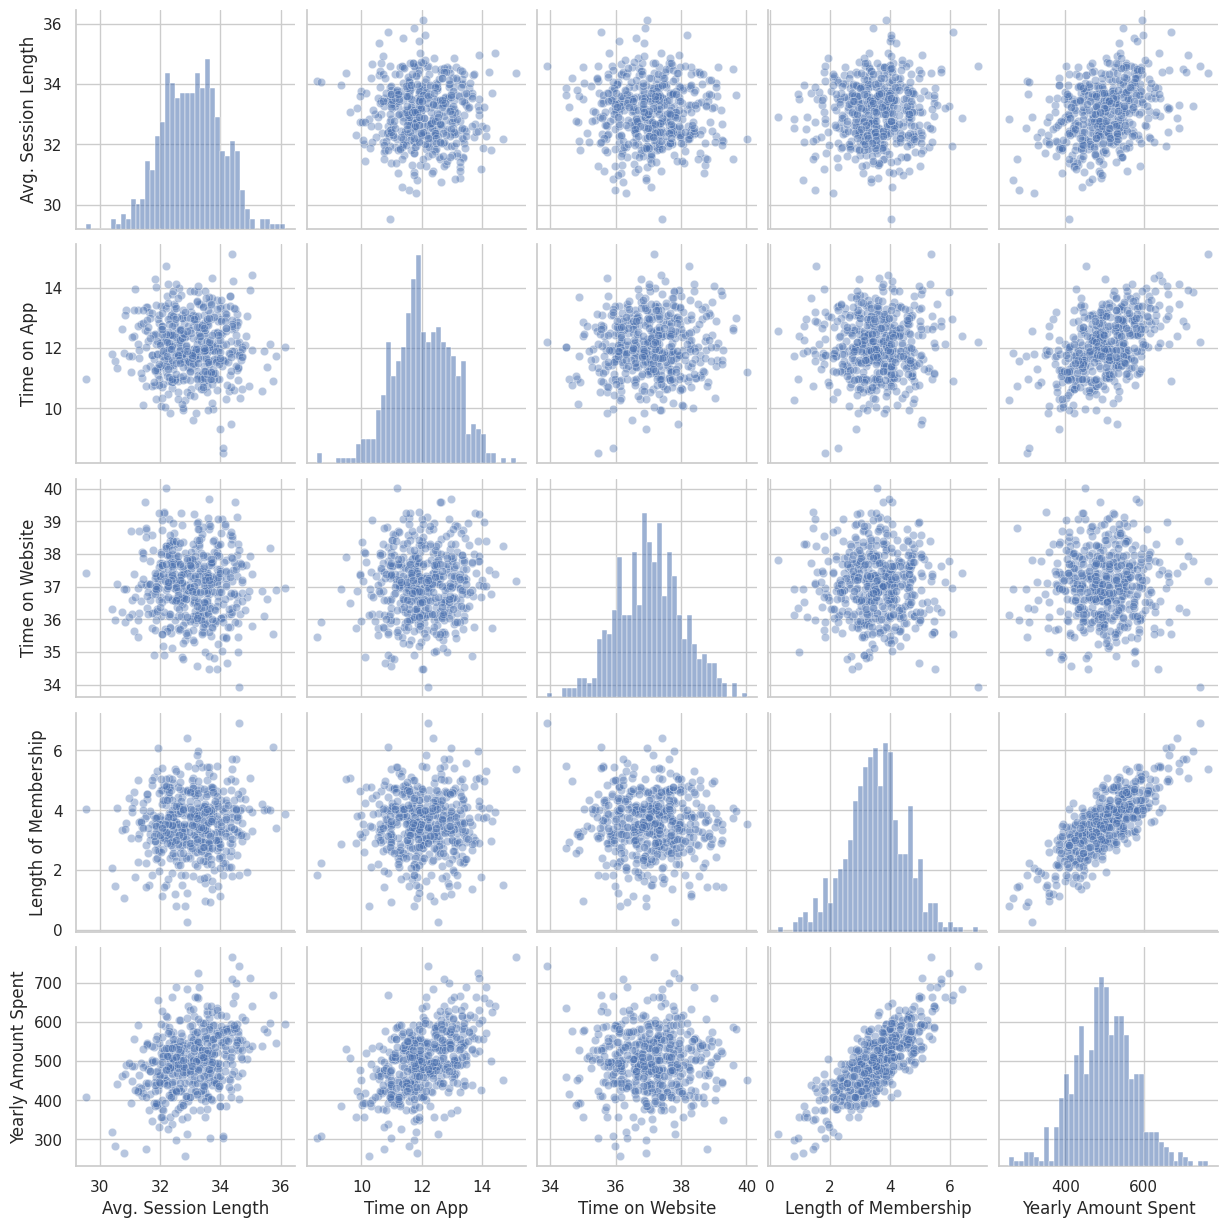

In [8]:
sns.pairplot(rawdata,
             kind='scatter',
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55, 'bins':40})

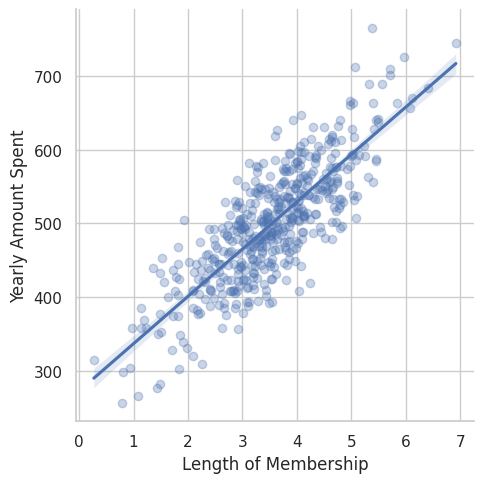

In [9]:
# length of membership vs yearly amount spent
sns.lmplot(x='Length of Membership',
           y='Yearly Amount Spent',
           data=rawdata,
           scatter_kws={'alpha':0.3})

Regression Metrics:

Test MSE: 103.91554136503333
Test RMSE: 10.193897260863155
Test MAE: 8.426091641432116
Test R²: 0.9808757641125855
Correlation Analysis:
                       Yearly Amount Spent
Avg. Session Length              0.355088
Time on App                      0.499328
Time on Website                 -0.002641
Length of Membership             0.809084
Yearly Amount Spent              1.000000


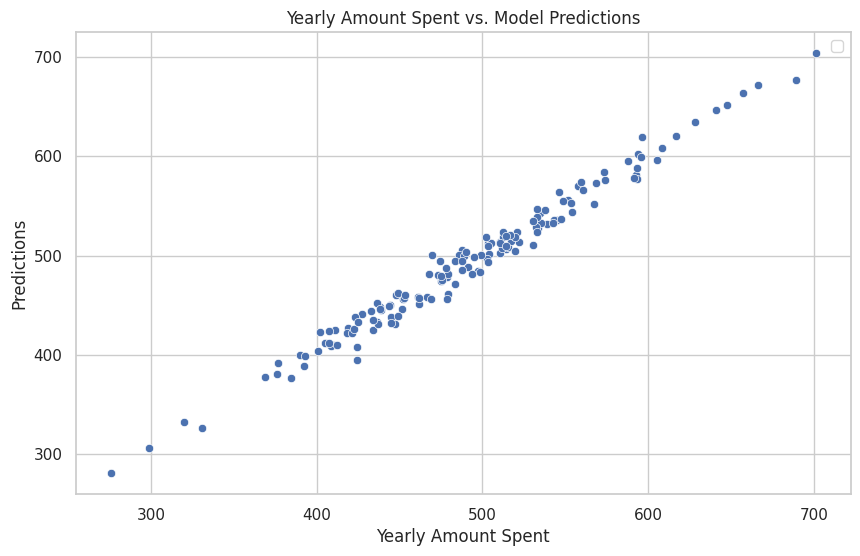

In [21]:
X = rawdata[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = rawdata['Yearly Amount Spent']
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_test_pred = model.predict(X_test)

# Regression Metrics
print(f'Regression Metrics:\n')
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R²: {r2_test}")
correlation_matrix = rawdata.corr(numeric_only=True)
print(f'Correlation Analysis:\n {correlation_matrix[["Yearly Amount Spent"]]}')

# Plotting the data and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
#plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')
plt.legend()
plt.show()



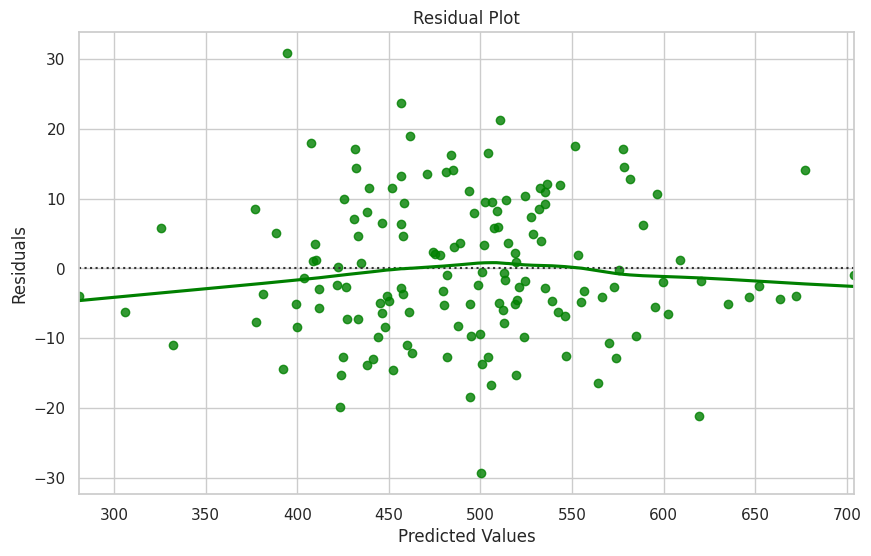

In [11]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))

sns.residplot(x=y_test_pred, y=residuals, lowess=True, color='green')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

<ipython-input-12-501e5ed4069d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, color='green')


Text(0.5, 1.0, 'Distribution of Residuals')

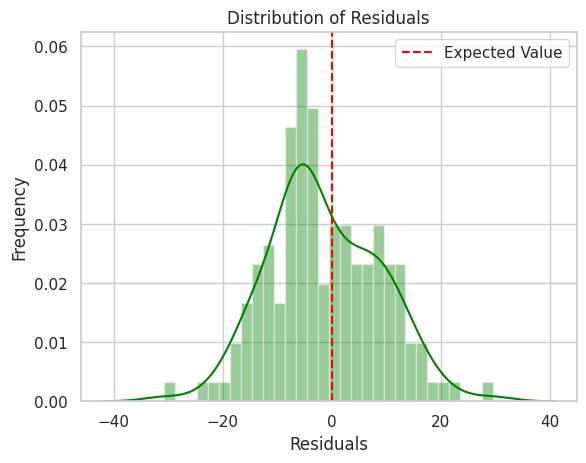

In [12]:
sns.distplot(residuals, bins=30, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Expected Value')
plt.legend()
plt.title('Distribution of Residuals')
